In [1]:
import pandas as pd
import seaborn as sns
import regex as re
import numpy as np
#import advertools as adv
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk

In [2]:
df = pd.read_csv(r"C:\Users\pavuc\Documents\CompSci\ML\.ipynb_checkpoints\IMDB-Dataset.csv")

In [3]:
#cleaning
#took this from you Mo :D
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removes URL
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removes special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing the noisy text
def clean_text(text):
    text = remove_html(text)
    text = remove_url(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text

#Apply function on review column
df['review'] = df['review'].apply(clean_text)
#map ratings to 1 and 0 for plotting ROC
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

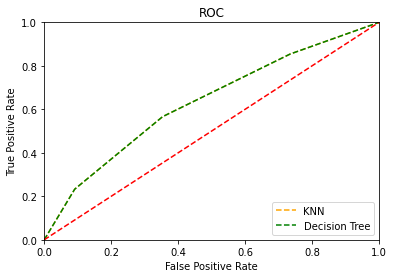


K Nearest Neighbors (NN = 3)
Accuracy Score: 60.6%
Confusion Matrix: 
[[3206 1755]
 [2185 2854]]

Decision Tree
Accuracy Score: 72.98%
Confusion Matrix: 
[[3598 1363]
 [1339 3700]]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics

X = df.review
y = df.sentiment

vect = CountVectorizer(analyzer = 'word', stop_words = 'english')

#splitting the dataset, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#vectorizing 
vect.fit(X_train)
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

#training the knn model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_dtm, y_train)
y_pred_knn = knn.predict(X_test_dtm)

#training the decision tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train_dtm, y_train)
y_pred_dt = dt.predict(X_test_dtm)

# calculate the fpr and tpr for all thresholds of the classification
#for plotting ROC
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

probs_knn = knn.predict_proba(X_test_dtm)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, probs_knn[:,1])
roc_auc_knn = metrics.auc(fpr1, tpr1)

probs_dt = knn.predict_proba(X_test_dtm)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, probs_dt[:,1])
roc_auc_dt = metrics.auc(fpr2, tpr2)

import matplotlib.pyplot as plt
plt.title('ROC')
#plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
#plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_knn)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_knn), sep = '\n')

print('\nDecision Tree')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_dt)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred_dt), sep = '\n')
